In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
species = df['Species'].unique()

In [10]:
print(species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
numeric = df.select_dtypes(include='float64')

In [12]:
group = df.groupby('Species')

In [13]:
for s in species:
    individual_species = group.get_group(s)
    print('\nSpecies', s, '\n')
    print(individual_species.describe())


Species Iris-setosa 

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Species Iris-versicolor 

              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.46991

In [14]:
def statistic(data):
    mean = sum(data)/len(data)
    variance = (sum((x-mean)**2 for x in data))/(len(data)-1)
    std = variance**0.5
    print("mean",mean)
    print("variance", variance)
    print("std",std)

In [15]:
for s in species:
    new_data = group.get_group(s)
    for i in numeric:
        print("\n",s,"-",i)
        statistic(new_data[i])


 Iris-setosa - SepalLengthCm
mean 5.005999999999999
variance 0.12424897959183666
std 0.3524896872134512

 Iris-setosa - SepalWidthCm
mean 3.4180000000000006
variance 0.1451795918367347
std 0.38102439795469095

 Iris-setosa - PetalLengthCm
mean 1.464
variance 0.030106122448979603
std 0.1735111594364455

 Iris-setosa - PetalWidthCm
mean 0.2439999999999999
variance 0.011493877551020404
std 0.10720950308167837

 Iris-versicolor - SepalLengthCm
mean 5.936
variance 0.2664326530612246
std 0.5161711470638635

 Iris-versicolor - SepalWidthCm
mean 2.7700000000000005
variance 0.09846938775510206
std 0.3137983233784114

 Iris-versicolor - PetalLengthCm
mean 4.26
variance 0.22081632653061237
std 0.46991097723995806

 Iris-versicolor - PetalWidthCm
mean 1.3259999999999998
variance 0.039106122448979576
std 0.197752680004544

 Iris-virginica - SepalLengthCm
mean 6.587999999999998
variance 0.40434285714285706
std 0.635879593274432

 Iris-virginica - SepalWidthCm
mean 2.9739999999999998
variance 0.1040

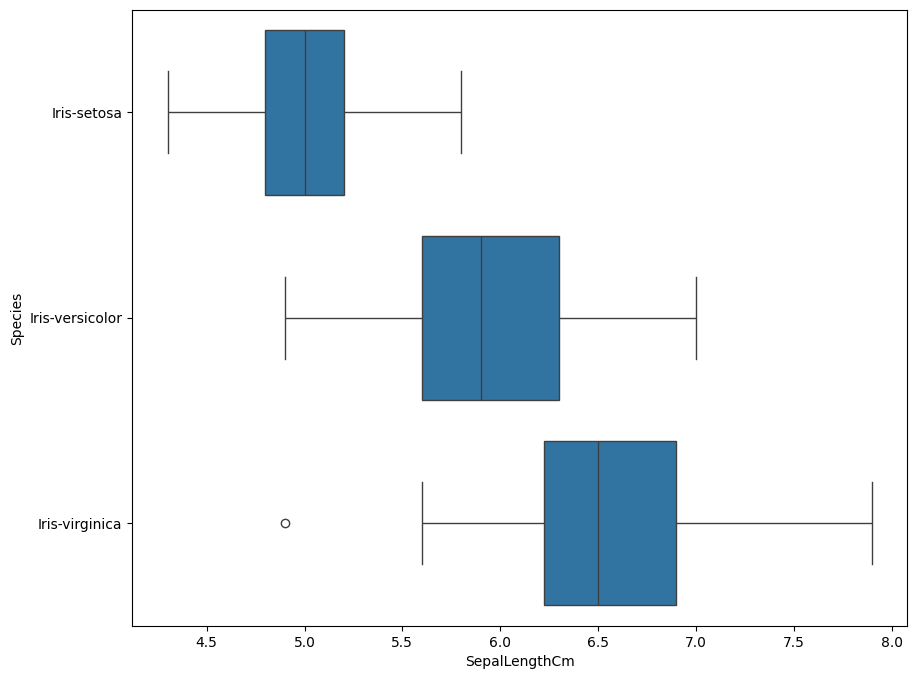

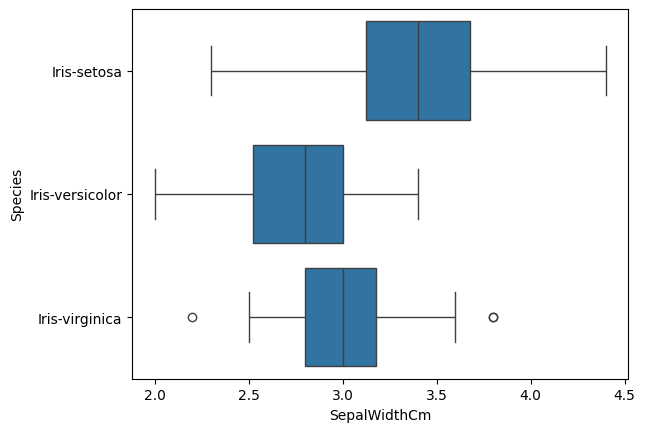

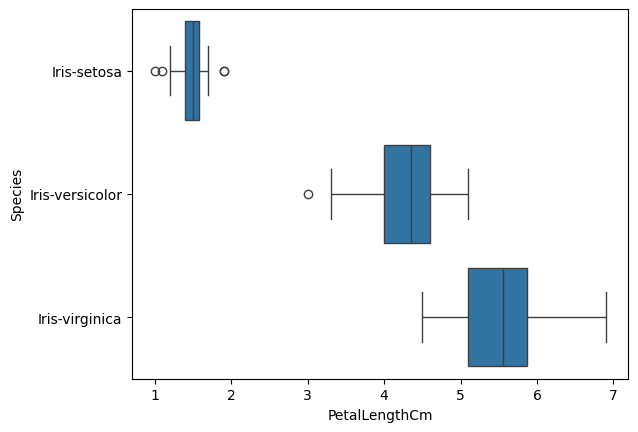

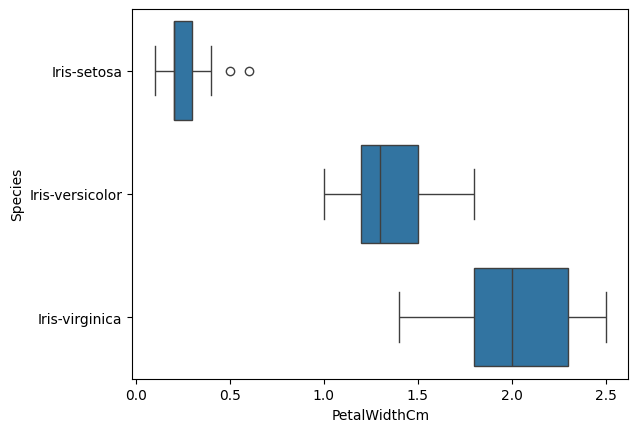

In [16]:
plt.figure(figsize=(10,8))
for n in numeric:
    sns.boxplot(x = n, y = 'Species', data = df)
    plt.show()
    